In [3]:
from google.colab import files

uploaded = files.upload()


Saving KEYS.csv to KEYS.csv
Saving REDFIN_MEDIAN_SALE_PRICE.csv to REDFIN_MEDIAN_SALE_PRICE (1).csv
Saving CENSUS_POPULATION_STATE.tsv to CENSUS_POPULATION_STATE (1).tsv
Saving CENSUS_MHI_STATE.csv to CENSUS_MHI_STATE (1).csv


In [5]:
import pandas as pd

mhi = pd.read_csv("CENSUS_MHI_STATE.csv")
pop = pd.read_csv("CENSUS_POPULATION_STATE.tsv", sep='\t')
keys = pd.read_csv("KEYS.csv")
redfin = pd.read_csv("REDFIN_MEDIAN_SALE_PRICE.csv")


In [6]:
print("MHI:\n", mhi.head())
print("POPULATION:\n", pop.head())
print("KEYS:\n", keys.head())
print("REDFIN:\n", redfin.head())


MHI:
                                     Label (Grouping)  \
0  HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATIN...   
1                                         Households   
2                                         One race--   
3                                              White   
4                          Black or African American   

  Alabama!!Number!!Estimate Alabama!!Number!!Margin of Error  \
0                       NaN                              NaN   
1                 1,969,105                           ±6,574   
2                       NaN                              NaN   
3                 1,327,559                           ±5,320   
4                   513,880                           ±3,525   

  Alabama!!Percent Distribution!!Estimate  \
0                                     NaN   
1                               1,969,105   
2                                     NaN   
3                                  67.40%   
4                                  26.10%   

 

In [7]:
# Example: Rename 2022 columns to make them clear before merging
mhi = mhi.rename(columns={'2022': '2022 Median Household Income', '2021': '2021 Median Household Income'})
redfin = redfin.rename(columns={'2022': '2022 Median Sale Price', '2021': '2021 Median Sale Price'})
pop = pop.rename(columns={'2022': '2022 Population', '2021': '2021 Population'})


In [8]:
df = keys.copy()
df = df.merge(mhi[['State', '2022 Median Household Income', '2021 Median Household Income']], on='State', how='left')
df = df.merge(redfin[['State', '2022 Median Sale Price', '2021 Median Sale Price']], on='State', how='left')
df = df.merge(pop[['State', '2022 Population', '2021 Population']], on='State', how='left')


KeyError: "None of [Index(['State', '2022 Median Household Income',\n       '2021 Median Household Income'],\n      dtype='object')] are in the [columns]"

In [10]:
print("MHI columns:", mhi.columns)
print("REDFIN columns:", redfin.columns)
print("POP columns:", pop.columns)
print("KEYS columns:", keys.columns)


MHI columns: Index(['Label (Grouping)', 'Alabama!!Number!!Estimate',
       'Alabama!!Number!!Margin of Error',
       'Alabama!!Percent Distribution!!Estimate',
       'Alabama!!Percent Distribution!!Margin of Error',
       'Alabama!!Median income (dollars)!!Estimate',
       'Alabama!!Median income (dollars)!!Margin of Error',
       'Alaska!!Number!!Estimate', 'Alaska!!Number!!Margin of Error',
       'Alaska!!Percent Distribution!!Estimate',
       ...
       'Wyoming!!Percent Distribution!!Estimate',
       'Wyoming!!Percent Distribution!!Margin of Error',
       'Wyoming!!Median income (dollars)!!Estimate',
       'Wyoming!!Median income (dollars)!!Margin of Error',
       'Puerto Rico!!Number!!Estimate', 'Puerto Rico!!Number!!Margin of Error',
       'Puerto Rico!!Percent Distribution!!Estimate',
       'Puerto Rico!!Percent Distribution!!Margin of Error',
       'Puerto Rico!!Median income (dollars)!!Estimate',
       'Puerto Rico!!Median income (dollars)!!Margin of Error'],
 

In [11]:
import re

# Gather columns ending with 'Median income (dollars)!!Estimate'
mhi_cols = [col for col in mhi.columns if col.endswith('Median income (dollars)!!Estimate')]
# Strip state names for new DataFrame
states = [col.split('!!')[0] for col in mhi_cols]

mhi_2022 = pd.DataFrame({
    'State': states,
    '2022 Median Household Income': [mhi[col].values[0] for col in mhi_cols]  # Assumes the estimate is in the first row
})


In [12]:
pop_cols = [col for col in pop.columns if col.endswith('!!Estimate')]
states = [col.split('!!')[0] for col in pop_cols]

pop_2022 = pd.DataFrame({
    'State': states,
    '2022 Population': [pop[col].values[0] for col in pop_cols]
})


In [13]:
# Extract columns ending with 'Median income (dollars)!!Estimate'
mhi_cols = [col for col in mhi.columns if col.endswith('Median income (dollars)!!Estimate')]
states = [col.split('!!')[0] for col in mhi_cols]

# Get 2022 Median Household Income (assuming row 0 is the estimate for 2022)
mhi_2022 = pd.DataFrame({
    'State': states,
    '2022 Median Household Income': [mhi[col].values[0] for col in mhi_cols]
})
print(mhi_2022.head())


        State  2022 Median Household Income
0     Alabama                           NaN
1      Alaska                           NaN
2     Arizona                           NaN
3    Arkansas                           NaN
4  California                           NaN


In [14]:
pop_cols = [col for col in pop.columns if col.endswith('!!Estimate')]
states_pop = [col.split('!!')[0] for col in pop_cols]

# Get 2022 Population (assuming row 0 is the estimate for 2022)
pop_2022 = pd.DataFrame({
    'State': states_pop,
    '2022 Population': [pop[col].values[0] for col in pop_cols]
})
print(pop_2022.head())


        State  2022 Population
0     Alabama              NaN
1      Alaska              NaN
2     Arizona              NaN
3    Arkansas              NaN
4  California              NaN


In [15]:
print(mhi.head(3))  # See if rows correspond to years


                                    Label (Grouping)  \
0  HOUSEHOLD INCOME BY RACE AND HISPANIC OR LATIN...   
1                                         Households   
2                                         One race--   

  Alabama!!Number!!Estimate Alabama!!Number!!Margin of Error  \
0                       NaN                              NaN   
1                 1,969,105                           ±6,574   
2                       NaN                              NaN   

  Alabama!!Percent Distribution!!Estimate  \
0                                     NaN   
1                               1,969,105   
2                                     NaN   

  Alabama!!Percent Distribution!!Margin of Error  \
0                                            NaN   
1                                         ±6,574   
2                                            NaN   

  Alabama!!Median income (dollars)!!Estimate  \
0                                        NaN   
1                               

In [16]:
print(redfin.head(10))
print(redfin.columns)


    Unnamed: 0 Month of Period End Month of Period End.1  \
0       Region        January 2012         February 2012   
1      Alabama               $131K                 $153K   
2       Alaska               $240K                 $246K   
3      Arizona               $125K                 $127K   
4     Arkansas               $100K                 $108K   
5   California               $281K                 $286K   
6     Colorado               $220K                 $204K   
7     Columbia               $353K                 $395K   
8  Connecticut               $175K                 $180K   
9     Delaware               $162K                 $158K   

  Month of Period End.2 Month of Period End.3 Month of Period End.4  \
0            March 2012            April 2012              May 2012   
1                 $140K                 $142K                 $155K   
2                 $243K                 $242K                 $251K   
3                 $135K                 $142K          

In [17]:
# Try to find all unique state or region names
print(redfin['redfin_region'].unique() if 'redfin_region' in redfin.columns else 'No region column found')

# If you see a 'Period End' or 'Year' column, filter for 2022


No region column found


In [18]:
df = mhi_2022.merge(pop_2022, on='State', how='inner')
# Add REDFIN extraction once available


In [19]:
# Extract all columns ending with 'Median income (dollars)!!Estimate'
mhi_cols = [col for col in mhi.columns if col.endswith('Median income (dollars)!!Estimate')]
states_mhi = [col.split('!!')[0] for col in mhi_cols]

mhi_2022 = pd.DataFrame({
    'State': states_mhi,
    '2022 Median Household Income': [float(mhi[col].iloc[0]) for col in mhi_cols]
})


In [20]:
pop_cols = [col for col in pop.columns if col.endswith('!!Estimate')]
states_pop = [col.split('!!')[0] for col in pop_cols]

pop_2022 = pd.DataFrame({
    'State': states_pop,
    '2022 Population': [int(pop[col].iloc[0]) for col in pop_cols]
})


ValueError: cannot convert float NaN to integer

In [21]:
pop_data = []
for col in pop_cols:
    val = pop[col].iloc[0]
    state = col.split('!!')[0]
    if pd.notnull(val):  # only keep valid numbers
        pop_data.append({'State': state, '2022 Population': int(val)})

pop_2022 = pd.DataFrame(pop_data)
print(pop_2022.head())


Empty DataFrame
Columns: []
Index: []


In [22]:
for col in pop_cols:
    val = pop[col].iloc[0]
    if pd.isnull(val):
        print(f"Column {col} is NaN in row 0")


Column Alabama!!Estimate is NaN in row 0
Column Alaska!!Estimate is NaN in row 0
Column Arizona!!Estimate is NaN in row 0
Column Arkansas!!Estimate is NaN in row 0
Column California!!Estimate is NaN in row 0
Column Colorado!!Estimate is NaN in row 0
Column Connecticut!!Estimate is NaN in row 0
Column Delaware!!Estimate is NaN in row 0
Column District of Columbia!!Estimate is NaN in row 0
Column Florida!!Estimate is NaN in row 0
Column Georgia!!Estimate is NaN in row 0
Column Hawaii!!Estimate is NaN in row 0
Column Idaho!!Estimate is NaN in row 0
Column Illinois!!Estimate is NaN in row 0
Column Indiana!!Estimate is NaN in row 0
Column Iowa!!Estimate is NaN in row 0
Column Kansas!!Estimate is NaN in row 0
Column Kentucky!!Estimate is NaN in row 0
Column Louisiana!!Estimate is NaN in row 0
Column Maine!!Estimate is NaN in row 0
Column Maryland!!Estimate is NaN in row 0
Column Massachusetts!!Estimate is NaN in row 0
Column Michigan!!Estimate is NaN in row 0
Column Minnesota!!Estimate is Na

In [23]:
print(pop.head(10))


                            Label (Grouping) Alabama!!Estimate  \
0                                SEX AND AGE               NaN   
1                           Total population         5,108,468   
2                                       Male         2,471,801   
3                                     Female         2,636,667   
4          Sex ratio (males per 100 females)              93.7   
5                              Under 5 years           288,019   
6                               5 to 9 years           305,731   
7                             10 to 14 years           331,262   
8                             15 to 19 years           350,694   
9                             20 to 24 years           333,795   

  Alabama!!Margin of Error Alabama!!Percent Alabama!!Percent Margin of Error  \
0                      NaN              NaN                              NaN   
1                    *****        5,108,468                              (X)   
2                   ±5,359       

In [24]:
print(pop['Alabama!!Estimate'][:10])


0          NaN
1    5,108,468
2    2,471,801
3    2,636,667
4         93.7
5      288,019
6      305,731
7      331,262
8      350,694
9      333,795
Name: Alabama!!Estimate, dtype: object


In [25]:
pop_data = []
for col in pop_cols:
    series = pop[col].dropna()
    if not series.empty:
        val = series.values[0]
        state = col.split('!!')[0]
        pop_data.append({'State': state, '2022 Population': int(val)})
pop_2022 = pd.DataFrame(pop_data)
print(pop_2022.head())


ValueError: invalid literal for int() with base 10: '5,108,468'

In [26]:
pop_data = []
for col in pop_cols:
    series = pop[col].dropna()
    if not series.empty:
        val = series.values[0]
        state = col.split('!!')[0]
        try:
            val_clean = int(str(val).replace(',', ''))  # remove commas
            pop_data.append({'State': state, '2022 Population': val_clean})
        except ValueError:
            print(f"Skipping {state}, value: {val}")
pop_2022 = pd.DataFrame(pop_data)
print(pop_2022.head())


        State  2022 Population
0     Alabama          5108468
1      Alaska           733406
2     Arizona          7431344
3    Arkansas          3067732
4  California         38965193


In [27]:
mhi_cols = [col for col in mhi.columns if col.endswith('Median income (dollars)!!Estimate')]
states_mhi = [col.split('!!')[0] for col in mhi_cols]

mhi_data = []
for col, state in zip(mhi_cols, states_mhi):
    series = mhi[col].dropna()
    if not series.empty:
        val = series.values[0]
        try:
            val_clean = int(str(val).replace(',', ''))
            mhi_data.append({'State': state, '2022 Median Household Income': val_clean})
        except ValueError:
            print(f"Skipping {state}, value: {val}")
mhi_2022 = pd.DataFrame(mhi_data)
print(mhi_2022.head())


        State  2022 Median Household Income
0     Alabama                         62027
1      Alaska                         89336
2     Arizona                         76872
3    Arkansas                         58773
4  California                         96334


In [28]:
print(redfin.head(10))
print(redfin.columns)


    Unnamed: 0 Month of Period End Month of Period End.1  \
0       Region        January 2012         February 2012   
1      Alabama               $131K                 $153K   
2       Alaska               $240K                 $246K   
3      Arizona               $125K                 $127K   
4     Arkansas               $100K                 $108K   
5   California               $281K                 $286K   
6     Colorado               $220K                 $204K   
7     Columbia               $353K                 $395K   
8  Connecticut               $175K                 $180K   
9     Delaware               $162K                 $158K   

  Month of Period End.2 Month of Period End.3 Month of Period End.4  \
0            March 2012            April 2012              May 2012   
1                 $140K                 $142K                 $155K   
2                 $243K                 $242K                 $251K   
3                 $135K                 $142K          

In [29]:
df = mhi_2022.merge(pop_2022, on='State', how='inner').merge(redfin_2022, on='State', how='inner')


NameError: name 'redfin_2022' is not defined

In [30]:
print(redfin.head(10))
print(redfin.columns)


    Unnamed: 0 Month of Period End Month of Period End.1  \
0       Region        January 2012         February 2012   
1      Alabama               $131K                 $153K   
2       Alaska               $240K                 $246K   
3      Arizona               $125K                 $127K   
4     Arkansas               $100K                 $108K   
5   California               $281K                 $286K   
6     Colorado               $220K                 $204K   
7     Columbia               $353K                 $395K   
8  Connecticut               $175K                 $180K   
9     Delaware               $162K                 $158K   

  Month of Period End.2 Month of Period End.3 Month of Period End.4  \
0            March 2012            April 2012              May 2012   
1                 $140K                 $142K                 $155K   
2                 $243K                 $242K                 $251K   
3                 $135K                 $142K          

In [31]:
# Show all column names
print(list(redfin.columns))


['Unnamed: 0', 'Month of Period End', 'Month of Period End.1', 'Month of Period End.2', 'Month of Period End.3', 'Month of Period End.4', 'Month of Period End.5', 'Month of Period End.6', 'Month of Period End.7', 'Month of Period End.8', 'Month of Period End.9', 'Month of Period End.10', 'Month of Period End.11', 'Month of Period End.12', 'Month of Period End.13', 'Month of Period End.14', 'Month of Period End.15', 'Month of Period End.16', 'Month of Period End.17', 'Month of Period End.18', 'Month of Period End.19', 'Month of Period End.20', 'Month of Period End.21', 'Month of Period End.22', 'Month of Period End.23', 'Month of Period End.24', 'Month of Period End.25', 'Month of Period End.26', 'Month of Period End.27', 'Month of Period End.28', 'Month of Period End.29', 'Month of Period End.30', 'Month of Period End.31', 'Month of Period End.32', 'Month of Period End.33', 'Month of Period End.34', 'Month of Period End.35', 'Month of Period End.36', 'Month of Period End.37', 'Month of

In [32]:
# Find the column for December 2022
for col in redfin.columns:
    if "December 2022" in col:
        print(col)


In [33]:
# Replace 'Month of Period End.131' with the actual column name you find for December 2022
dec2022_col = None
for col in redfin.columns:
    if "December 2022" in col:
        dec2022_col = col
        break

# Now create DataFrame
redfin_2022 = redfin.iloc[1:].copy()  # Skip the first row (header/label row)
redfin_2022 = redfin_2022[['Unnamed: 0', dec2022_col]]
redfin_2022.columns = ['State', '2022 Median Sale Price']

# Remove $ and commas, convert to int
redfin_2022['2022 Median Sale Price'] = redfin_2022['2022 Median Sale Price'].str.replace('$', '').str.replace('K', '000').str.replace(',', '').str.strip()
redfin_2022['2022 Median Sale Price'] = redfin_2022['2022 Median Sale Price'].astype(int)

print(redfin_2022.head())


KeyError: '[None] not in index'

In [34]:
for i, col in enumerate(redfin.columns):
    print(i, col)
    if '2022' in col:
        print(" --> 2022 candidate:", col)


0 Unnamed: 0
1 Month of Period End
2 Month of Period End.1
3 Month of Period End.2
4 Month of Period End.3
5 Month of Period End.4
6 Month of Period End.5
7 Month of Period End.6
8 Month of Period End.7
9 Month of Period End.8
10 Month of Period End.9
11 Month of Period End.10
12 Month of Period End.11
13 Month of Period End.12
14 Month of Period End.13
15 Month of Period End.14
16 Month of Period End.15
17 Month of Period End.16
18 Month of Period End.17
19 Month of Period End.18
20 Month of Period End.19
21 Month of Period End.20
22 Month of Period End.21
23 Month of Period End.22
24 Month of Period End.23
25 Month of Period End.24
26 Month of Period End.25
27 Month of Period End.26
28 Month of Period End.27
29 Month of Period End.28
30 Month of Period End.29
31 Month of Period End.30
32 Month of Period End.31
33 Month of Period End.32
34 Month of Period End.33
35 Month of Period End.34
36 Month of Period End.35
37 Month of Period End.36
38 Month of Period End.37
39 Month of Period E

In [35]:
redfin = pd.read_csv('REDFIN_MEDIAN_SALE_PRICE.csv', header=1)
print(redfin.columns)


Index(['Region', 'January 2012', 'February 2012', 'March 2012', 'April 2012',
       'May 2012', 'June 2012', 'July 2012', 'August 2012', 'September 2012',
       ...
       'May 2024', 'June 2024', 'July 2024', 'August 2024', 'September 2024',
       'October 2024', 'November 2024', 'December 2024', 'January 2025',
       'February 2025'],
      dtype='object', length=159)


In [36]:
for col in redfin.columns:
    if "December 2022" in col:
        print(col)


December 2022


In [37]:
# Replace 'December 2022' with the exact column name if it differs
redfin_2022 = redfin[['Region', 'December 2022']].copy()
redfin_2022.columns = ['State', '2022 Median Sale Price']

# Clean up: remove '$', 'K', and ',' then convert to integer
redfin_2022['2022 Median Sale Price'] = (
    redfin_2022['2022 Median Sale Price']
    .str.replace('$','', regex=False)
    .str.replace('K','000', regex=False)
    .str.replace(',','', regex=False)
    .str.strip()
    .astype(int)
)

print(redfin_2022.head())


        State  2022 Median Sale Price
0     Alabama                  269000
1      Alaska                  336000
2     Arizona                  410000
3    Arkansas                  231000
4  California                  704000


In [38]:
df = mhi_2022.merge(pop_2022, on='State', how='inner').merge(redfin_2022, on='State', how='inner')
print(df.head())


        State  2022 Median Household Income  2022 Population  \
0     Alabama                         62027          5108468   
1      Alaska                         89336           733406   
2     Arizona                         76872          7431344   
3    Arkansas                         58773          3067732   
4  California                         96334         38965193   

   2022 Median Sale Price  
0                  269000  
1                  336000  
2                  410000  
3                  231000  
4                  704000  


In [39]:
df['Home Price to Income Ratio'] = df['2022 Median Sale Price'] / df['2022 Median Household Income']


In [40]:
# Make sure 'State' in both DataFrames matches in format (case, whitespace)
df = df.merge(keys[['alternative_name', 'state_abbreviation']], left_on='State', right_on='alternative_name', how='left')
df = df.drop(columns=['alternative_name'])
df = df.rename(columns={'state_abbreviation': 'Abbreviation'})


In [41]:
df['Rank by Income'] = df['2022 Median Household Income'].rank(ascending=False, method='min')
df['Rank by Price'] = df['2022 Median Sale Price'].rank(ascending=False, method='min')
df['Rank by Price/Income Ratio'] = df['Home Price to Income Ratio'].rank(ascending=False, method='min')


In [42]:
final_columns = [
    'State', 'Abbreviation',
    '2022 Median Household Income',
    '2022 Median Sale Price',
    '2022 Population',
    'Home Price to Income Ratio',
    'Rank by Income',
    'Rank by Price',
    'Rank by Price/Income Ratio'
]
df = df[final_columns]


In [43]:
df.to_csv('output.csv', index=False)
from google.colab import files
files.download('output.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
df['Home Price to Income Ratio'] = df['Home Price to Income Ratio'].round(2)


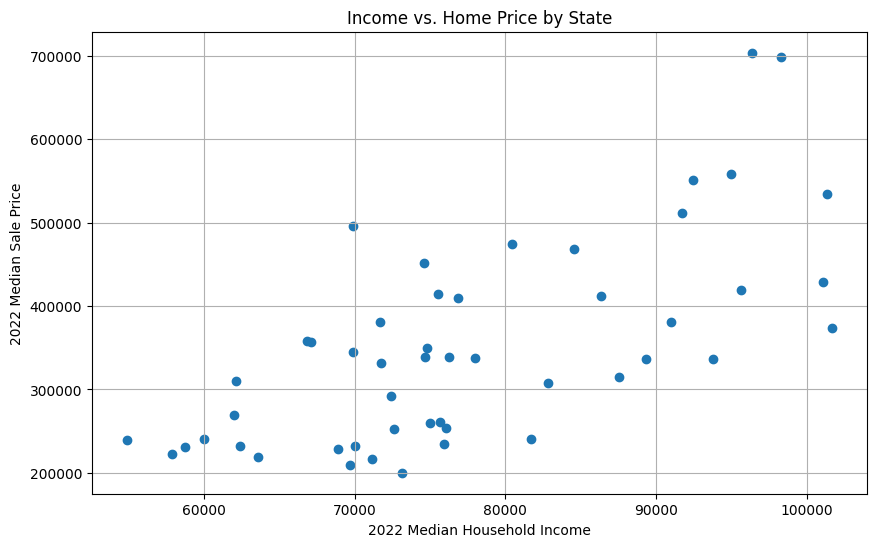

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['2022 Median Household Income'], df['2022 Median Sale Price'])
plt.xlabel('2022 Median Household Income')
plt.ylabel('2022 Median Sale Price')
plt.title('Income vs. Home Price by State')
plt.grid(True)
plt.show()


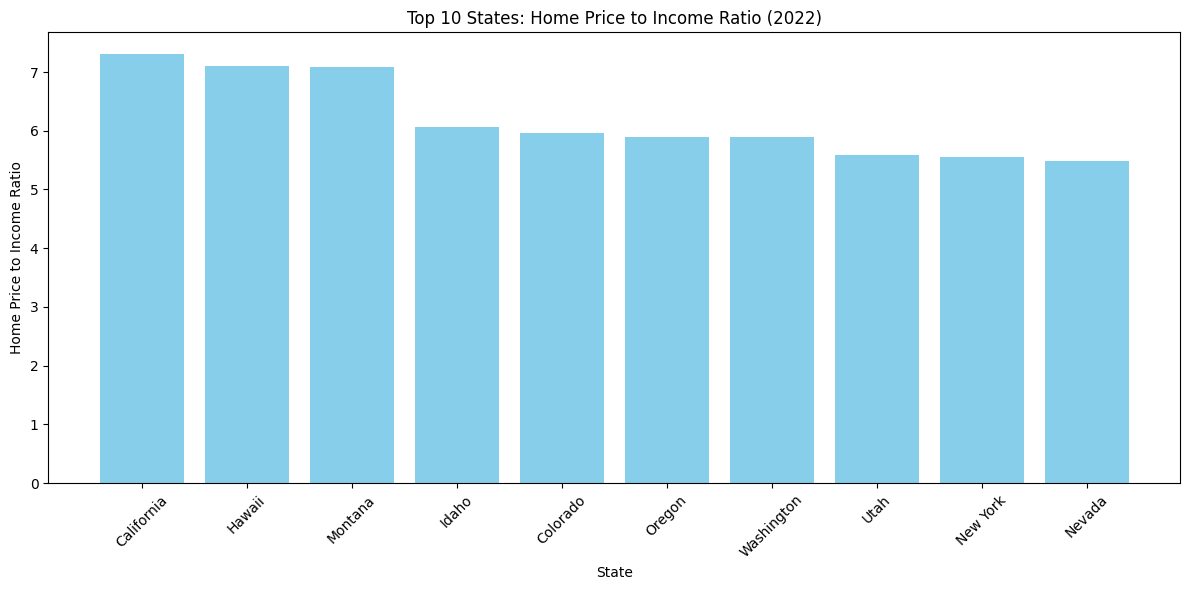

In [46]:
top10 = df.sort_values('Home Price to Income Ratio', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top10['State'], top10['Home Price to Income Ratio'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Home Price to Income Ratio')
plt.title('Top 10 States: Home Price to Income Ratio (2022)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


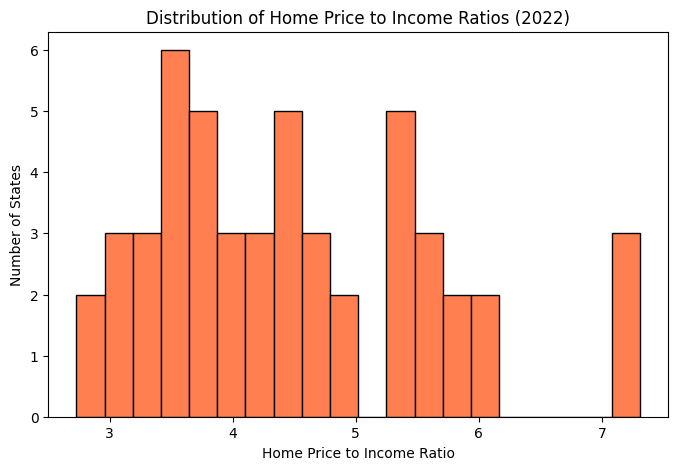

In [47]:
plt.figure(figsize=(8,5))
plt.hist(df['Home Price to Income Ratio'], bins=20, color='coral', edgecolor='black')
plt.xlabel('Home Price to Income Ratio')
plt.ylabel('Number of States')
plt.title('Distribution of Home Price to Income Ratios (2022)')
plt.show()


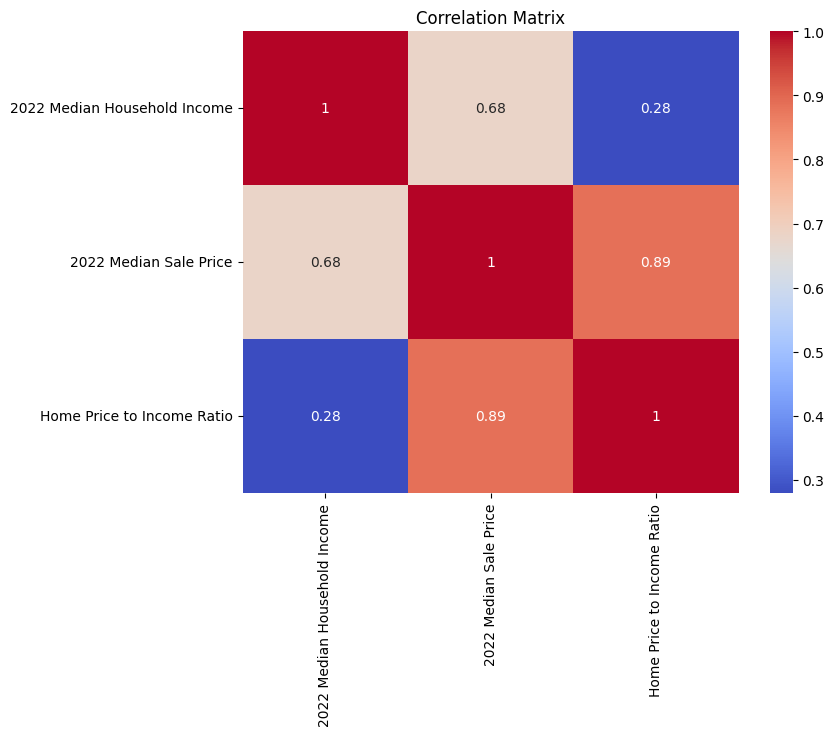

In [49]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df[['2022 Median Household Income', '2022 Median Sale Price', 'Home Price to Income Ratio']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('income_vs_price.png')
plt.show()
